# utils not working; most likely problem with path

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import poisson

In [2]:
from scipy.stats import poisson

lam = 1.4 
dist = poisson(lam)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [3]:
k = 4
dist.pmf(k)

0.039471954028253146

In [4]:
from empiricaldist import Pmf

In [5]:
def make_poisson_pmf(lam, qs):
    ps = poisson(lam).pmf(qs)
    pmf = Pmf(ps, qs)
    pmf.normalize()
    return pmf

In [6]:
lam = 1.4
goals = np.arange(10)
pmf_goals = make_poisson_pmf(lam, goals)

In [7]:
pmf_goals.head()

,probs
0,0.246598
1,0.345237
2,0.241666


In [10]:
# from utils import decorate

# def decorate_goals(title=''):
#     decorate(xlabel='Number of goals',
#         ylabel='PMF',
#         title=title)

<AxesSubplot:>

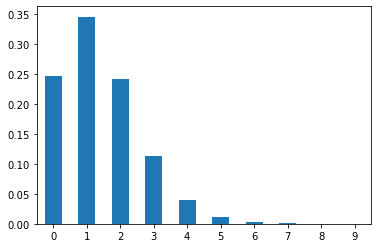

In [11]:
 pmf_goals.plot.bar(x=0, y=1, rot=0)

In [12]:
from scipy.stats import gamma

In [13]:
alpha = 1.4
qs = np.linspace(0, 10, 101)
ps = gamma(alpha).pdf(qs)

In [14]:
from empiricaldist import Pmf

In [15]:
prior = Pmf(ps, qs)
prior.normalize()

9.889360237140306

In [16]:
def decorate_rate(title=''):
    decorate(xlabel='Goal scoring rate (lam)',
        ylabel='PMF',
        title=title)

NameError: name 'decorate' is not defined

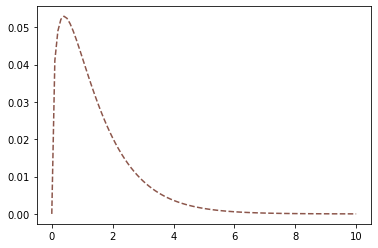

In [17]:
prior.plot(ls='--', label='prior', color='C5')
decorate_rate(r'Prior distribution of $\lambda$')

In [18]:
lam = 1.4
k = 4
poisson(lam).pmf(4)

0.039471954028253146

In [19]:
lams = prior.qs
k = 4
likelihood = poisson(lams).pmf(k)

In [20]:
def update_poisson(pmf, data):
    k = data
    lams = pmf.qs
    likelihood = poisson(lams).pmf(k)
    pmf *= likelihood
    pmf.normalize()

In [21]:
france = prior.copy()
update_poisson(france, 4)

<AxesSubplot:>

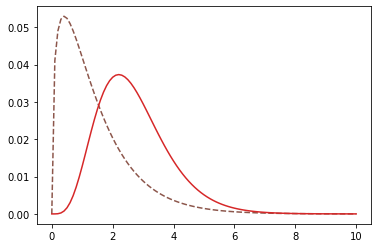

In [23]:
prior.plot(ls='--', label='prior', color='C5')
france.plot(label='France posterior', color='C3')

# decorate_rate('Posterior distribution for France')

In [24]:
croatia = prior.copy()
update_poisson(croatia, 2)

<AxesSubplot:>

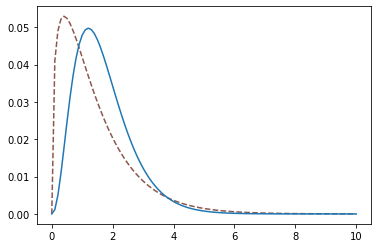

In [26]:
prior.plot(ls='--', label='prior', color='C5')
croatia.plot(label='Croatia posterior', color='C0')

# decorate_rate('Posterior distribution for Croatia')

In [27]:
print(croatia.mean(), france.mean())

1.6999765866755225 2.699772393342308


In [28]:
def prob_gt(pmf1, pmf2):
    total = 0
    for q1, p1 in pmf1.items():
        for q2, p2 in pmf2.items():
            if q1 > q2:
                total += p1 * p2
    return total

In [29]:
prob_gt(france, croatia)

0.7499366290930155

In [30]:
Pmf.prob_gt(france, croatia)

0.7499366290930174

In [31]:
pmf_seq = [make_poisson_pmf(lam, goals)
          for lam in prior.qs]

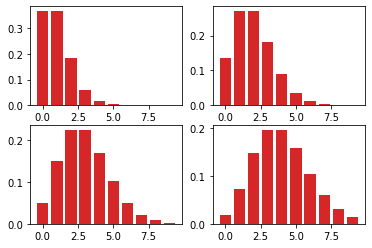

In [33]:
import matplotlib.pyplot as plt

for i, index in enumerate([10, 20, 30, 40]):
    plt.subplot(2, 2, i+1)
    lam = prior.qs[index]
    pmf = pmf_seq[index]
    pmf.bar(label=f'$\lambda$ = {lam}', color='C3')
#     decorate_goals()

utils not working

In [38]:
!pip install utils

In [40]:
# from utils import make_mixture
# pred_france = make_mixture(france, pmf_seq)

In [41]:
# win = Pmf.prob_gt(pred_france, pred_croatia)